Data of Dogs and Cat With Labels output in X and Y

In [2]:
# installing the Kaggle library
!pip install kaggle

In [6]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp /kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
# Kaggle api
!kaggle competitions download -c dogs-vs-cats

 95% 773M/812M [00:07<00:01, 38.4MB/s]
100% 812M/812M [00:07<00:00, 118MB/s] 


In [8]:
!ls

dogs-vs-cats.zip  kaggle  sample_data


In [9]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [10]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [44]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


In [ ]:
file_names = os.listdir('/content/train/')
print(file_names)

In [78]:
import os

# List of image filenames
filenames = file_names
directory = '/content/train'

x = []
y = []

# Counters
dog_count = 0
cat_count = 0

# Loop through filenames
for fname in filenames:
    x.append(os.path.join(directory, fname))

    if 'dog' in fname:
        y.append(1)
        dog_count += 1
    else:
        y.append(0)
        cat_count += 1

# Output
# print("x:", x)
# print("y:", y)
print("Dog count:", dog_count)
print("Cat count:", cat_count)


Dog count: 12500
Cat count: 12500


In [47]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow
import cv2

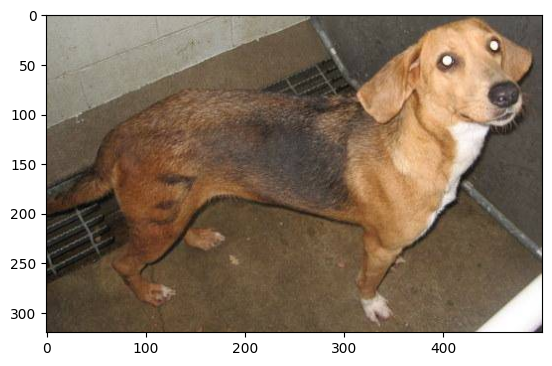

In [48]:
# display dog image
img = mpimg.imread(x[0])
imgplt = plt.imshow(img)
plt.show()

In [49]:
# Limit to first 1000
x_subset = x[:1000]
y_subset = y[:1000]

# Load and convert images to array
dog_cat_images = np.asarray([
    cv2.resize(cv2.imread(file), (224, 224)) for file in x_subset
    if cv2.imread(file) is not None
], dtype=np.float32) / 255.0  # normalize to 0-1

# Optionally check if shape is correct
print("dog_cat_images shape:", dog_cat_images.shape)
print("y_subset length:", len(y_subset))



dog_cat_images shape: (1000, 224, 224, 3)
y_subset length: 1000


In [50]:
unique, counts = np.unique(y_subset, return_counts=True)

# Display results
for label, count in zip(unique, counts):
    print(f"Label {label}: {count} samples")

Label 0: 492 samples
Label 1: 508 samples


In [ ]:
dog_cat_images[0]

In [63]:
y_subset = np.array(y_subset)

In [64]:
type(y_subset)

numpy.ndarray

In [65]:
y_subset.shape

(1000,)

Train Test Split

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(dog_cat_images, y_subset, test_size=0.2, random_state=2)

In [ ]:
X_train[0]

In [58]:
Y_train[10]

1

Neural Network Pretrained model

In [27]:
import tensorflow as tf
import tensorflow_hub as hub

In [28]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

# # Load pretrained feature extractor
# feature_extractor = hub.KerasLayer(mobilenet_model, input_shape=(224, 224, 3), trainable=False)



# Alternative way I found on articles
base_model = tf.keras.applications.MobileNetV2(input_shape=(224,224,3),
                                               include_top=False,
                                                weights='imagenet')


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [29]:
base_model.summary()
# Expects input size good
# output one more layer 2 ouput

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_3[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [72]:
num_of_classes = 2
# Cat and Dog 0 and 1


# Always problem since deprecated use tf methods now documentation
# model = tf.keras.Sequential([

#     pretrained_model,
#     tf.keras.layers.Dense(num_of_classes)

# ])

# Layering through function call
inputs = tf.keras.Input(shape=(224, 224, 3))
# Single Neuron + Sigmoid (Binary classification)
# Loss: binary_crossentropy
x = base_model(inputs, training=False) #(None, 7, 7, 1280) Ouput
x = tf.keras.layers.GlobalAveragePooling2D()(x) # Output: (None, 1280) Flatten
outputs = tf.keras.layers.Dense(2, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

model.summary()



# binary_crossentropy -> Sigmoid and ouput 1
# 2, activation='softmax' ->
# categorical_crossentropy (if labels are one-hot encoded) or
# sparse_categorical_crossentropy (if labels are integers like 0, 1)

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 2)              │         2,562 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,260,546 (8.62 MB)

 Trainable params: 2,226,434 (8.49 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [73]:
# model.compile(
#     optimizer = 'adam',
#     loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#     metrics = ['acc']
# )

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [61]:
print(X_train.shape)

(800, 224, 224, 3)


In [67]:
print(Y_train.shape)

(800,)


In [75]:
model.fit(X_train, Y_train, epochs=1)

25/25 ━━━━━━━━━━━━━━━━━━━━ 163s 6s/step - accuracy: 0.9283 - loss: 0.1710


In [76]:
score, acc = model.evaluate(X_test, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 866ms/step - accuracy: 0.7759 - loss: 0.8555
Test Loss = 0.6730846166610718
Test Accuracy = 0.7900000214576721


Predicitve System

Path of the image to be predicted: /content/train/cat.100.jpg


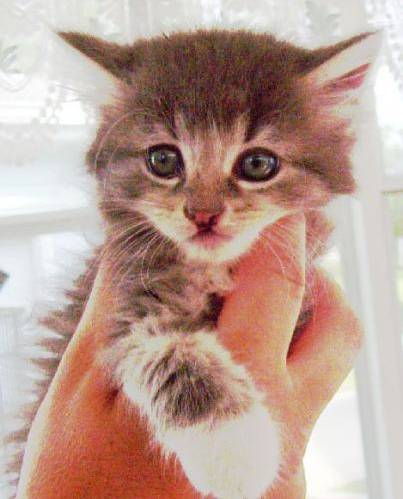

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[9.9994826e-01 5.1727035e-05]]
0
The image represents a Cat


In [77]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')